### Preperations

Lets first import the relevant libraries and then load the data into the dataframe df

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("../data/King_County_House_prices_dataset.csv")

### Price dependency on condition and grade

Here, I want to analyse the dependence of the price on the condition and the grade. First, I want to get an overview over these factors. Therefore, I am grouping the dataset on the condition/grade and checking the mean price.

In [3]:
df.groupby('condition').price.mean()

condition
1    341067.241379
2    328178.758824
3    542173.057347
4    521374.450414
5    612577.742504
Name: price, dtype: float64

In [4]:
df.groupby('grade').price.mean()

grade
3     2.620000e+05
4     2.120019e+05
5     2.485240e+05
6     3.019166e+05
7     4.025946e+05
8     5.429868e+05
9     7.737382e+05
10    1.072347e+06
11    1.497792e+06
12    2.202528e+06
13    3.710769e+06
Name: price, dtype: float64

We can already see that the grade is a very stable predictor of the mean price. For the condition this relationship is not so strong, however, it still seems to exist. 

Next I will plot these variables again:

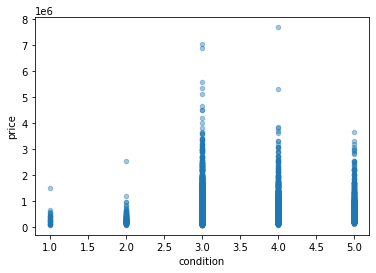

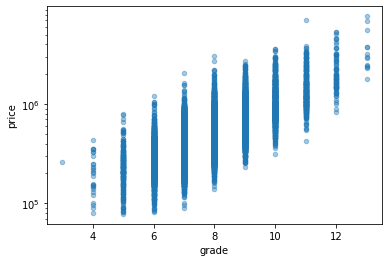

In [5]:
fig = df.plot(kind='scatter', x='condition', y='price', alpha=0.4)
fig = df.plot(kind='scatter', x='grade', y='price', alpha=0.4)
fig.set_yscale('log')

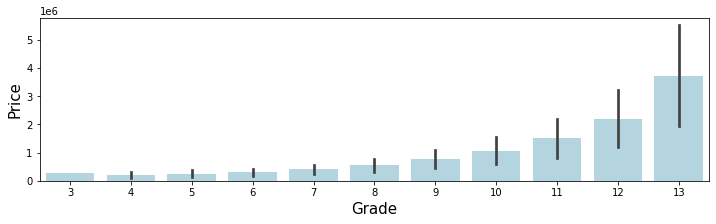

In [42]:
plt.figure(figsize=(12, 3))

# plot a bar chart
b = sns.barplot(
    x="grade", 
    y="price", 
    data=df, 
     
    ci='sd', 
    color='lightblue')
b.set_xlabel("Grade",fontsize=15)
b.set_ylabel("Price",fontsize=15)
#b.set(yscale="log")
b.tick_params(labelsize=10)

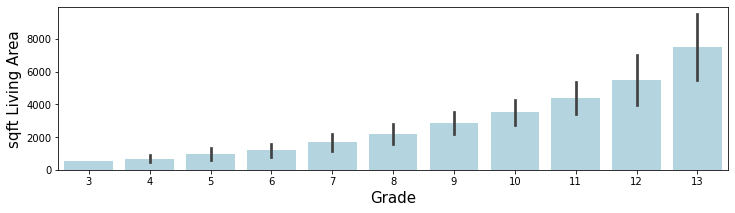

In [40]:
plt.figure(figsize=(12, 3))

# plot a bar chart
b = sns.barplot(
    x="grade", 
    y="sqft_living", 
    data=df, 
     
    ci='sd', 
    color='lightblue')

b.set_xlabel("Grade",fontsize=15)
b.set_ylabel("sqft Living Area",fontsize=15)
b.tick_params(labelsize=10)

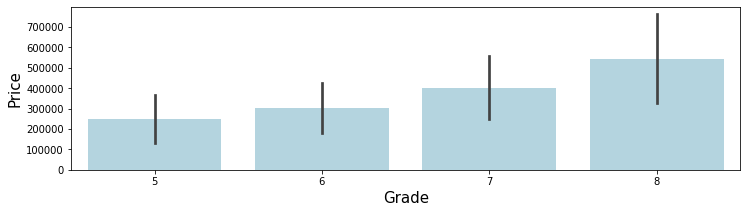

In [43]:
plt.figure(figsize=(12, 3))

# plot a bar chart
b = sns.barplot(
    x="grade", 
    y="price", 
    data=df.query('grade>4 and grade <9'), 
     
    ci='sd', 
    color='lightblue')
b.set_xlabel("Grade",fontsize=15)
b.set_ylabel("Price",fontsize=15)
b.tick_params(labelsize=10)

In [33]:
df['price_per_sqft_living']=df.price / df.sqft_living


In [46]:
df['price_per_sqft_living_wider_category'] = pd.cut(df.price_per_sqft_living, bins=4, right=True, labels=False, retbins=False, precision=3, include_lowest=True, duplicates='raise', ordered=True)


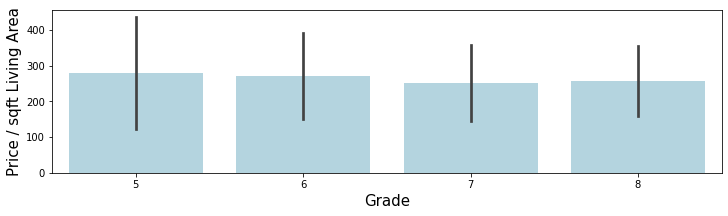

In [45]:

plt.figure(figsize=(12, 3))

# plot a bar chart
b = sns.barplot(
    x="grade", 
    y="price_per_sqft_living", 
    data=df.query('grade>4 and grade <9'), 
     
    ci='sd', 
    color='lightblue')
b.set_xlabel("Grade",fontsize=15)
b.set_ylabel("Price / sqft Living Area",fontsize=15)
b.tick_params(labelsize=10)

The plots underline the previous finding. 

Next I want to test my hypothesis using the OLS model.

In [6]:
smf.ols(formula='price ~ condition', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.11
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           1.16e-07
Time:                        09:34:54   Log-Likelihood:            -3.0738e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.709e+05   1.33e+04     35.322      0.000    4.45e+05    4.97e+05
condition   2.036e+04   3840.295      5.302      0.000    1.28e+04    2.79e+04
==============================================================================
Omnibus:                    19113.390   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1136802.126
Skew:                           4.025   Prob(JB):                         0.00
Kurtosis:                      37.619   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
smf.ols(formula='price ~ grade', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:34:54   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The t value for condition is not quite as high. Also with an R<sup>2></sup> of 0.001 this value is extremely low. However, the t value and its corresponding P>|t| are relatively high and low, respectively. Also the R<sup>2></sup> value (0.446) is much higher compared to condition.  

price = 4.709 x 10<sup>5</sup> +	2.036 x 10<sup>4</sup>  x condition
<br><br>
price  =  -1.061 x 10<sup>6</sup>   +	2.092 x 10<sup>5</sup>  x grade

Interpretation:
<p>The price of the house seems to correlate with the grade of the house. This grade is based on King County grading system, which seems to be a much better predictor than the overall condition. It is not clear to me, how the overall condition was estimated. 


Lets plot the residuals:

In [8]:

...

Ellipsis

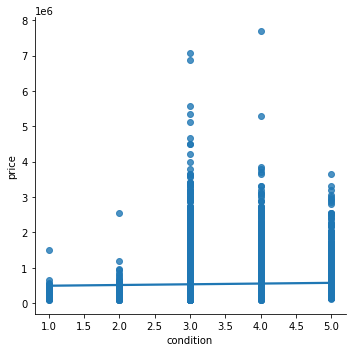

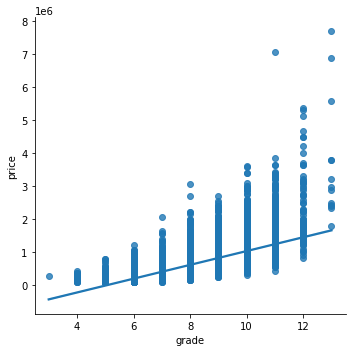

In [9]:
sns.lmplot(data=df, x='condition', y='price')
sns.lmplot(data=df, x='grade', y='price')

In the condition plot we can see that many pricy houses got a medium condition. It might be that these houses actually have a good grade but they need to get a renovation. I will exclude houses where the last rennovation was long ago.  

First, I will look at the distribution of yr_renovated, which shows the year of the last rennovation. 

<AxesSubplot:ylabel='Frequency'>

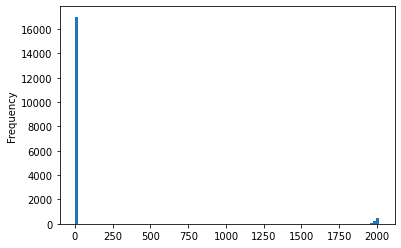

In [10]:
df.yr_renovated.plot(kind='hist',bins=100)

Most of the values have a value of zero, which probably means that it is not known when they were renovated last, or they were never renovated. If we take a look of the distribution of the acutally renovated houses, we see this:

<AxesSubplot:ylabel='Frequency'>

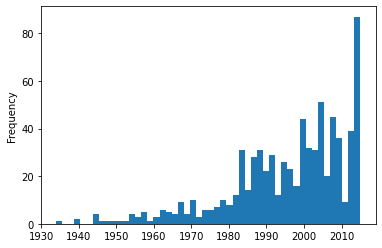

In [11]:
df[df['yr_renovated']>1750].yr_renovated.plot(kind='hist', bins =50)

Lets check the condition distribution of these houses:

<AxesSubplot:xlabel='condition', ylabel='price'>

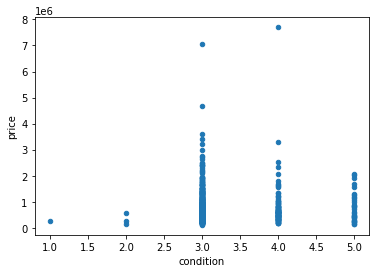

In [12]:
df_ren = df[df['yr_renovated']>1750]
df_ren.plot(kind='scatter',x='condition',y='price')

If we make a regression model, we get the following:

In [13]:
smf.ols(formula='price ~ condition', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.11
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           1.16e-07
Time:                        09:34:56   Log-Likelihood:            -3.0738e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.709e+05   1.33e+04     35.322      0.000    4.45e+05    4.97e+05
condition   2.036e+04   3840.295      5.302      0.000    1.28e+04    2.79e+04
==============================================================================
Omnibus:                    19113.390   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1136802.126
Skew:                           4.025   Prob(JB):                         0.00
Kurtosis:                      37.619   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, the R<sup>2</sup> value is extremly low. 
<p>Lets look at the yr_renovated distribution again. 

Now lets exclude houses that were not renovated after 1985

<AxesSubplot:xlabel='condition', ylabel='price'>

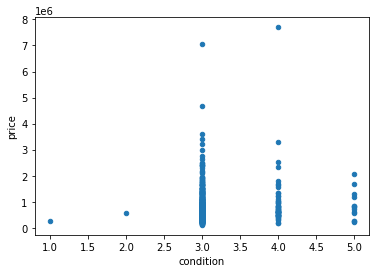

In [14]:
df_ren = df[df['yr_renovated']>1985]
df_ren.plot(kind='scatter',x='condition',y='price')

The distribution still looks very similar. excluding certain values in yr_renovated did not change the appearance of the condition-distribution. 

I will quickly check with what the condition correlates:

In [19]:
df_no_id = df.drop(labels='id', axis=1)
df_no_id_corr = df_no_id.corr()['condition']
df_no_id_corr

price            0.036056
bedrooms         0.026496
bathrooms       -0.126479
sqft_living     -0.059445
sqft_lot        -0.008830
floors          -0.264075
waterfront       0.017642
view             0.045735
condition        1.000000
grade           -0.146896
sqft_above      -0.158904
yr_built        -0.361592
yr_renovated    -0.061858
zipcode          0.002888
lat             -0.015102
long            -0.105877
sqft_living15   -0.093072
sqft_lot15      -0.003126
Name: condition, dtype: float64

Condtion seems to correlate with the year the house was built. 

<AxesSubplot:ylabel='Frequency'>

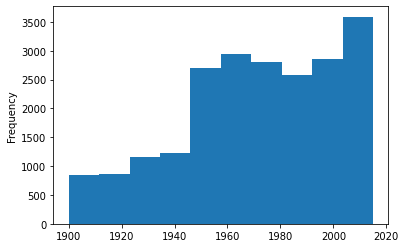

In [20]:
df.yr_built.plot(kind='hist')

lets exclude houses that were built before 1950 and plot the distribution of the condition again.

<AxesSubplot:xlabel='condition', ylabel='price'>

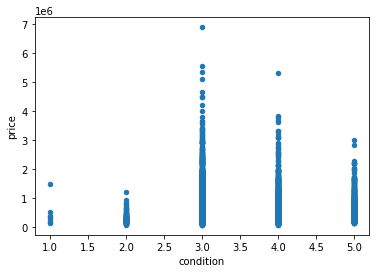

In [21]:
df_built = df[df['yr_built']>=1950]
df_built.plot(kind='scatter',x='condition',y='price')

The distribution still looks the same. I cannot figure out, why the condition distirbution looks like that...